In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [8]:
gtex=pd.read_csv('./gtex_tpm_median.csv',index_col=0)
gtex.shape

(54, 49422)

In [9]:
ips=pd.read_csv('./ips_tpm',index_col=0)
ips.shape

(330, 35049)

In [24]:
esc= pd.read_csv('./es_tpm.csv', index_col=0)
esc.shape

(30, 49878)

In [10]:
df=pd.concat([gtex.mean(),ips.median()],axis=1)
df.columns=['non','ips']
df=df.dropna()

In [11]:
df=df[~df.index.str.startswith('MT')]
df=df[~df.index.str.startswith('RP')]

In [12]:
tf=pd.read_csv('http://humantfs.ccbr.utoronto.ca/download/v_1.01/TF_names_v_1.01.txt',header=None)[0].values
len(tf)

1639

In [13]:
df=df.loc[df.index.intersection(tf)].drop('ZNF90')

In [14]:
df['ips/non']=(df.ips+1)/(df.non+1)

In [15]:
topi=df.sort_values('ips/non').tail(20)
topi

,non,ips,ips/non
SOX11,0.361332,27.675,21.063936
NR6A1,2.662632,78.955,21.829930
HMGA1,71.529864,1649.030,22.749664
MYCN,1.403588,54.825,23.225695
ETV4,2.473795,79.705,23.232516
ZNF93,1.242721,60.690,27.506759
PRDM14,0.016939,28.460,28.969292
ZIC3,1.221574,65.760,30.050767
ZNF730,0.233963,38.130,31.710831
TERF1,15.321696,630.370,38.682868


In [16]:
top=ips[topi.index]
top.head()

,SOX11,NR6A1,HMGA1,MYCN,ETV4,ZNF93,PRDM14,ZIC3,ZNF730,TERF1,OTX2,FOXH1,SALL4,NANOG,LIN28B,HES3,HMGA2,ZFP42,ZSCAN10,LIN28A
HPSI1213i-xuja_2,18.25,121.60,1472.39,40.83,127.80,6.55,9.11,25.89,29.39,372.52,12.41,33.59,50.82,29.70,59.59,11.90,116.87,1.45,124.57,604.83
HPSI0614i-voce_2,38.46,46.59,1512.42,42.43,160.50,62.64,34.90,74.20,39.74,548.07,23.39,103.33,61.61,294.24,98.49,87.72,101.83,120.50,124.65,719.11
HPSI0814i-doao_2,18.77,125.40,1560.67,63.13,94.98,46.75,8.18,47.42,14.00,324.28,71.03,45.55,59.89,50.72,51.61,48.33,111.52,19.19,149.76,582.86
HPSI0314i-sojd_3,26.91,63.96,1796.48,56.77,162.83,45.67,39.83,51.24,18.90,497.83,22.17,70.62,50.65,158.80,59.97,115.94,124.68,96.13,162.28,603.57
HPSI0114i-lexy_2,15.77,73.23,1840.20,66.68,98.88,43.36,39.70,62.78,20.22,494.42,73.53,38.39,66.87,112.58,62.68,35.43,101.78,136.03,178.80,623.28


In [17]:
top=top[top.median().sort_values(ascending=False).index]

[None]

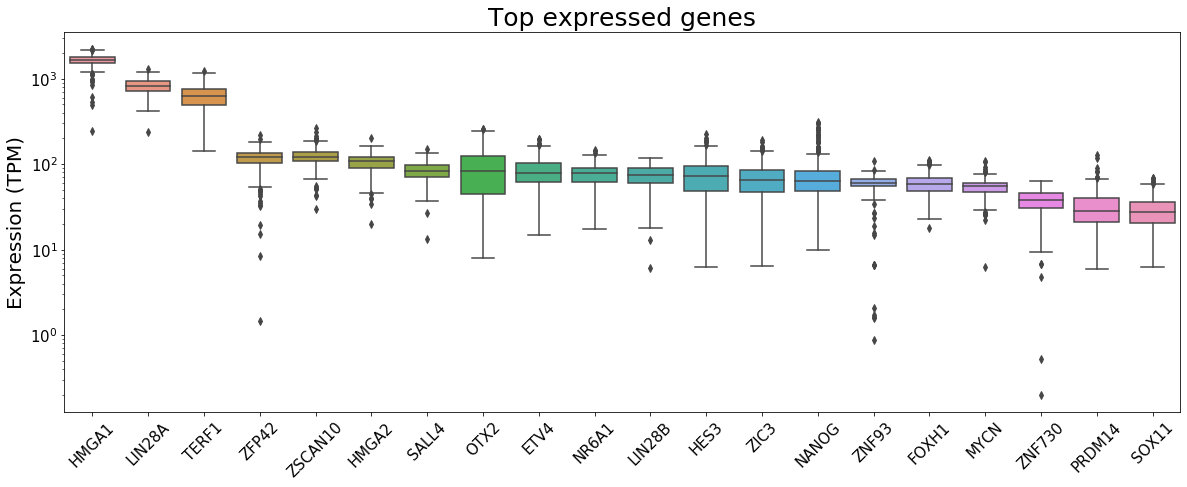

In [18]:
fig, ax = plt.subplots(figsize=(20,7))
plt.xticks(rotation=45);
b=sns.boxplot(data=top,ax=ax);
#b=sns.lineplot(data=test,linewidth=2,ax=ax)
b.axes.set_title("Top expressed genes",fontsize=25)
b.set_ylabel("Expression (TPM)",fontsize=20)
b.set_xlabel('',fontsize=0)
b.tick_params(labelsize=15)
ax.set(yscale="log")

In [28]:
test=esc.head(1)[top.median().sort_values(ascending=False).index].T
print(test)
print(type(test))

          HUES44
HMGA1    2131.69
LIN28A   1087.32
TERF1     659.41
ZFP42     155.56
ZSCAN10   183.41
HMGA2      92.86
SALL4     230.40
OTX2      402.18
ETV4       38.93
NR6A1      57.81
LIN28B     69.17
HES3       75.72
ZIC3      110.16
NANOG      47.32
ZNF93      59.62
FOXH1     124.98
MYCN      133.64
ZNF730      4.06
PRDM14    198.38
SOX11      29.29
<class 'pandas.core.frame.DataFrame'>


[None]

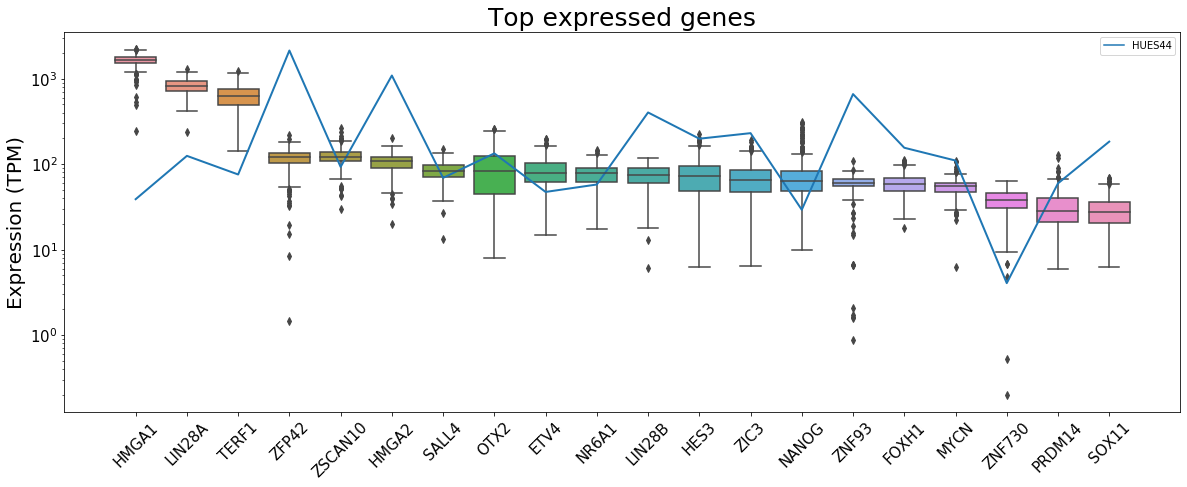

In [26]:
fig, ax = plt.subplots(figsize=(20,7))
plt.xticks(rotation=45);
b=sns.boxplot(data=top,ax=ax);
b=sns.lineplot(data=test,linewidth=2,ax=ax);
b.axes.set_title("Top expressed genes",fontsize=25)
b.set_ylabel("Expression (TPM)",fontsize=20)
b.set_xlabel('',fontsize=0)
b.tick_params(labelsize=15)
ax.set(yscale="log")

[None]

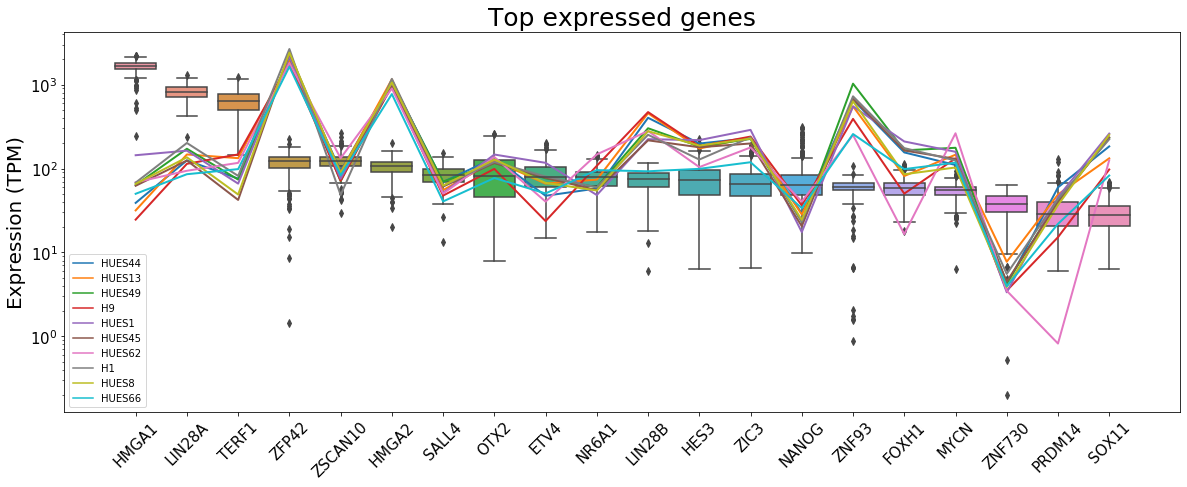

In [30]:
test=esc.head(10)[top.median().sort_values(ascending=False).index].T
fig, ax = plt.subplots(figsize=(20,7))
plt.xticks(rotation=45);
b=sns.boxplot(data=top,ax=ax);
b=sns.lineplot(data=test,linewidth=2,ax=ax,dashes=False)
b.axes.set_title("Top expressed genes",fontsize=25)
b.set_ylabel("Expression (TPM)",fontsize=20)
b.set_xlabel('',fontsize=0)
b.tick_params(labelsize=15)
ax.set(yscale="log")